## INTRODUCTION
### Population Dynamics Model: Prey-Predator Model

The prey-predator model, also known as the Lotka-Volterra model, is a mathematical framework used to study the dynamics of biological populations in ecological systems. This model describes the interactions between two species: a prey species (such as rabbits) and a predator species (such as foxes). The model assumes that the prey population grows exponentially in the absence of predators, while the predator population declines linearly in the absence of prey. The dynamics of the two populations are governed by a set of coupled ordinary differential equations.

The Lotka-Volterra equations for the prey ($R$) and predator ($P$) populations are as follows:

$$\frac{{dR}}{{dt}} = aR - bRP$$

$$\frac{{dP}}{{dt}} = -cP + dRP$$

where:
- $a$ represents the prey's natural growth rate,
- $b$ represents the predation rate coefficient,
- $c$ represents the predator's natural death rate,
- $d$ represents the efficiency of turning prey into new predators.

In these equations, the first term in each equation represents the natural growth or decline of the respective population, while the second term represents the interaction between the two populations. The prey population grows at a rate proportional to its current size ($aR$), but this growth is reduced by predation ($bRP$). Similarly, the predator population declines at a rate proportional to its current size ($-cP$), but this decline is mitigated by predation ($dRP$).

The Lotka-Volterra model predicts cyclic behavior in the populations, with fluctuations in the sizes of both the prey and predator populations over time. These fluctuations often exhibit stable limit cycles under certain conditions, representing a dynamic equilibrium between the two species.

Although the Lotka-Volterra gives the general impression of the environment, it just provides the
simplistic model. The necessary assumptions made while solving the above equations are:
1. The prey population finds ample food at all times.
2. The food supply of the predator population depends entirely on the size of the prey population.
3. The rate of change of population is proportional to its size.
4. During the process, the environment does not change in favour of one species, and genetic adaptation is inconsequential.
5. Predators have limitless appetite.

A more accurate model postulates that during analysis it looks at the effect on population growth with respect to the limiting resources or in a constrained environment. The maximum growth of any species is determined by the carrying capacity of the environment. The carrying capacity is the maximum population of any species that can exist at time. The pair of differential equations for population change of prey and predator including the carrying capacity of the population through the time is then given by:

$$\frac{dR}{dt} = a \cdot R \cdot \left(1 - \frac{R}{K_R}\right) - b \cdot R \cdot P$$

$$\frac{dP}{dt} = - c \cdot P + d \cdot b \cdot R \cdot P \cdot \left(1 - \frac{P}{K_P}\right)$$

Where,

$K_R$ = carrying capacity of prey
$K_P$ = carrying capacity of predator

## OBJECTIVES:
The objectives of the modelling are as follows:
1. To observe the change of populations with time and their interactions.
2. To observe the sensitivity of the populations with the initial populations.
3. To understand the affect of introducing carrying capacity of both populations in logistic environment.
4. To discuss the affect in populations after killings populations at a certain time.

## APPLICATIONS IN CHEMICAL ENGINEERING:
The application are:
1. Prey-predator modeling can be utilized to explain how microorganisms interact in a wastewater treatment system. In this instance, organic matter is viewed as the prey and the microbes that break it down as the predators. The microbial community may be optimized using the model to treat wastewater effectively.
2. The interplay between dangerous chemicals and safety mechanisms at a chemical plant may be modeled using prey-predator modelling. In this instance, the safety systems are viewed as the prey and the harmful compounds as the predators. The model may be used to optimize the layout and positioning of safety systems to protect people and the environment as effectively as possible.
3. One method for describing the reaction dynamics of a chemical reaction system is prey-predator modeling. In this instance, the reactants and products are viewed as prey and predators, respectively. The kinetics of the reaction may be understood using the model, and the reaction conditions can be optimized for maximum yield.
4. The generation of biofuels from algae may be optimized via prey-predator modeling. In this situation, the bacteria that eat the algae and turn them into biofuels are the predators, while the algae are the prey. For maximal biofuel generation, the model may be used to optimize the growing conditions for bacteria and algae.

## METHODOLOGY

### PROCEDURE:

1. Before starting to code the differential equations, important library packages were imported at the beginning. `NUMPY` is imported to operate mathematical arrays and matrices, `MATPLOTLIB` is imported to visualize the solved differential equations, and `SCIPY` is imported to integrate the differential equations and solve nonlinear equations.
2. All the initial parameter values are defined as well as the final time value for integration to end is defined. The initial feed concentration was put into an array `initialvalue` to be supplied to the ODE solver.
3. The time duration for the prey and predator modeling was defined as an array `t` by using `linspace` which created equispaced data points between the initial (0) and final time at the given total interval of 5000.
4. A function named `dXdt` was created where the dependent variable (number of Prey (R) and Predator (P)) and independent variable (time) are passed, and the two differential equations are returned.
5. An array of solved ODEs data points is obtained in the variable `X` at each time interval by using `odeint` library of `SCIPY` package. This library takes the defined function `model_f` containing ODEs to be solved, initial concentration values `initialvalue`, and dependent variable `t`.
6. The unsteady state concentration change was plotted using `PYPLOT` library from `MATPLOTLIB` package. The library intakes the x-axis value `t`, the y-axis value `R` and `P`, label, color, and linestyle of the curve. The specific concentration values of solved ODEs were taken out from array by using `sol[:,i]`. This takes out column values of species 'i' from all rows.
7. For the equilibrium point, `fsolve` library was imported from `SCIPY.OPTIMIZE` package. An array of initial guess was assigned to variable `guess`. A function `equilibrium` was created intaking only dependent variable, number of Prey (R), and Predator (P). An empty array `eq` was created and both ODEs instead of their derivative part was assigned as array element of `eq`. The function `equilibrium` returned array `eq`. An array of solutions to the equations was obtained by using `fsolve` and the answers were printed.

## RESULTS AND DISCUSSION
In the following section, we present the results obtained from our simulations and discuss their significance. These findings will provide insights into the behavior of the modeled systems and inform subsequent analyses.

### Solution of Lotka-Volterra Equation

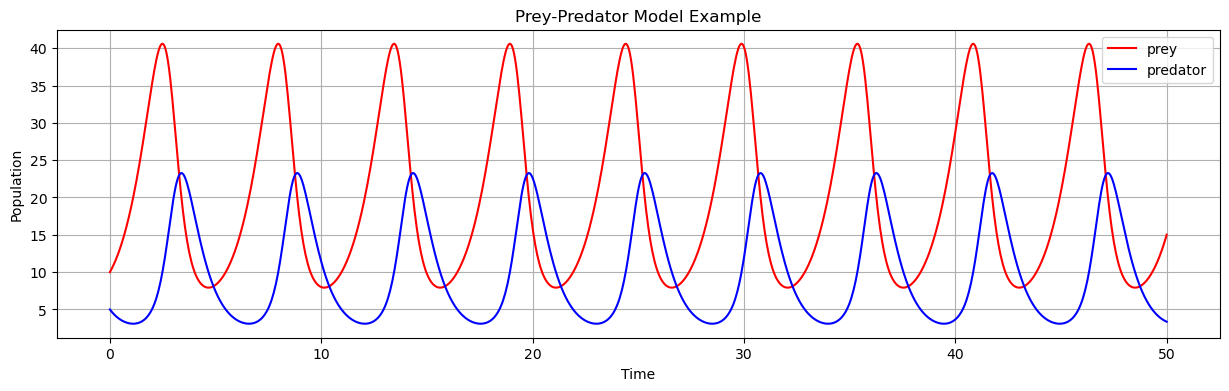

<Figure size 640x480 with 0 Axes>

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Defining parameters
a = 1    # Prey growth rate
b = 0.1  # Interaction rate between prey and predator
c = 1.5  # Predator death rate
d = 0.75 # Rate at which predators consume prey

# Defining the system of differential equations
def dXdt(X, t=0):
    return np.array([a * X[0] - b * X[0] * X[1], -c * X[1] + d * b * X[0] * X[1]])

# Creating Time vector
t = np.linspace(0, 50, 1000)

# Initializing conditions
X0 = np.array([10, 5])  # Initial population of prey and predator

# Integrating the system of differential equations
X = integrate.odeint(dXdt, X0, t)

# Separating prey and predator populations
prey, predator = X.T

# Plotting the populations over time
plt.figure(figsize=(15, 4))
plt.plot(t, prey, c='r', label="prey")       # Plot prey population
plt.plot(t, predator, 'b-', label="predator") # Plot predator population
plt.grid(True)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Prey-Predator Model Example")
plt.show()

# Saving the plot as a PDF file
plt.savefig("population.pdf")

The plot of change of Prey and Predator population with time by using Lotka-Volterra equations
is shown in figure above. The red line is the population of Prey while the blue line is of Predator. 
The analysis shows the population of preys decreasing with the increase in
population of predator. At one point, the population of predator starts decreasing with decrease in
preys which leads to scarcity of food for predators. At the moment, when the population of
predators decreases, the population of preys increase exponentially. Similarly, the increase and
decrease in population can be seen escalating with the same proportion which shows both are
equally dependent on each other.

### Prey vs Predator

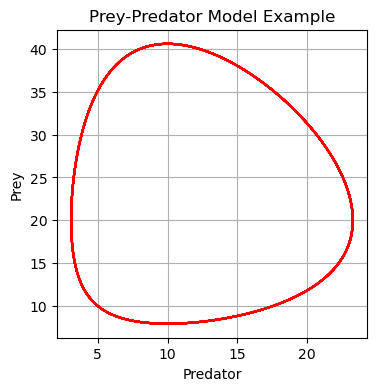

In [2]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Defining parameters
a = 1    # Prey growth rate
b = 0.1  # Interaction rate between prey and predator
c = 1.5  # Predator death rate
d = 0.75 # Rate at which predators consume prey

# Defining the system of differential equations
def dXdt(X, t=0):
    return np.array([a * X[0] - b * X[0] * X[1], -c * X[1] + d * b * X[0] * X[1]])

# Creating time vector
t = np.linspace(0, 50, 1000)

# Initializing conditions
X0 = np.array([10, 5])  # Initial population of prey and predator

# Integrating the system of differential equations
X = integrate.odeint(dXdt, X0, t)

# Separating prey and predator populations
prey, predator = X.T

# Creating a plot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plotting predator vs. prey
plt.plot(predator, prey, c='r')

# Adding plot details
plt.grid(True)
plt.xlabel("Predator")
plt.ylabel("Prey")
plt.title("Prey-Predator Model Example")
plt.show()


The plot illustrates the dynamics of a classic prey-predator model, where the predator population is represented on the x-axis, and the prey population is represented on the y-axis. Initially, both prey and predator populations experience growth, resulting in an increase in both populations over time. As the predator population grows, it begins to exert predation pressure on the prey population, leading to a decline in the prey population. Consequently, the reduction in prey availability causes a decrease in the predator population, resulting in a cyclic pattern of rise and fall for both populations. This cyclical behavior demonstrates the intricate relationship between prey and predator populations, highlighting the concept of ecological balance in natural ecosystems.

### Stationary Point in Prey Predator Graph

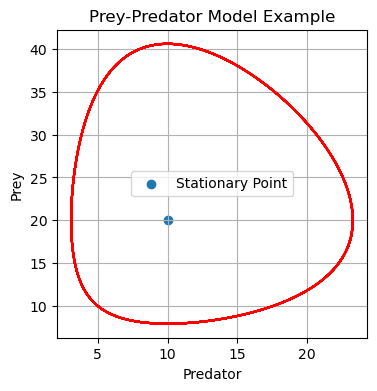

In [3]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Defining parameters
a = 1    # Prey growth rate
b = 0.1  # Interaction rate between prey and predator
c = 1.5  # Predator death rate
d = 0.75 # Rate at which predators consume prey

# Defining the system of differential equations
def dXdt(X, t=0):
    return np.array([a * X[0] - b * X[0] * X[1], -c * X[1] + d * b * X[0] * X[1]])

# Creating Time vector
t = np.linspace(0, 50, 1000)

# Initializing conditions
X0 = np.array([10, 5])  # Initial population of prey and predator

# Integrating the system of differential equations
X = integrate.odeint(dXdt, X0, t)

# Separating prey and predator populations
prey, predator = X.T

# Creating a plot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plotting predator vs. prey
plt.plot(predator, prey, c='r')

# Adding a point representing the stationary point
plt.scatter(a/b, c/(d*b), label="Stationary Point")

# Adding plot details
plt.grid(True)
plt.xlabel("Predator")
plt.ylabel("Prey")
plt.title("Prey-Predator Model Example")
plt.legend()
plt.show()


The plot illustrates the dynamics of a prey-predator model, showing the relationship between the prey and predator populations. The stationary point, represented by the intersection of the prey and predator populations, indicates an equilibrium where both populations stabilize. This equilibrium occurs at a specific ratio of prey to predator populations, determined by the parameters of the model. 

### Addition of slider to change the value of $K_R$ and visualize the changes in graph.

In [4]:
import ipywidgets as widgets
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Defining parameters
a = 1
b = 0.1
c = 1.5
d = 0.75
Kr = 50
Kp = 1 * 10 ** 7

# Defining the system of differential equations
def dXdt(X, t, change):
    return np.array([a * X[0] * (1 - (X[0] / Kr)) - b * X[0] * X[1], -c * X[1] + d * b * X[0] * X[1] * (1 - (X[1] / Kp))])

# Function to solve the ODEs
def run(X0, t, change):
    X = integrate.odeint(dXdt, X0, t, args=(change,))
    return t, X

# Initializing conditions and time array
X0 = np.array([10, 5])
t = np.linspace(0, 50, 1000)

# Initializing run with default Kr value
X = run(X0, t, Kr)
prey, predator = X[1].T

# Creating the plot
f1, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot(t, prey, label='Prey')
line2, = ax.plot(t, predator, label='Predator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Prey Predator Model Example')

# Function to update the plot based on Kr value changes
def update(change):
    # Re-run the simulation with the new Kr value
    X = run(X0, t, change)
    prey, predator = X[1].T
    line.set_ydata(prey)
    line.set_xdata(t)
    line2.set_ydata(predator)
    line2.set_xdata(t)
    f1.canvas.draw()

# Creating an integer slider widget for Kr value
int_slider = widgets.IntSlider(value=Kr, min=1, max=100, step=1, description='Kr=', continuous_update=True)

# Attaching the update function to the slider's value change
int_slider.observe(update, 'value')

# Displaying the slider
display(int_slider)


ModuleNotFoundError: No module named 'ipywidgets'

The plot demonstrates the population dynamics of prey and predator species over time, with the prey initially dominating due to the low predator population. As the predator population grows, it begins to exert a regulatory effect on the prey population, leading to a subsequent decline in prey numbers. Eventually, a stable equilibrium is reached where both prey and predator populations coexist in balance, influenced by the carrying capacities of the environment for each species.

### Predator vs Prey graph under logistic environment

In [ ]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

# Defining Parameters
a = 1    # Prey growth rate
b = 0.1  # Interaction rate between prey and predator
c = 1.5  # Predator death rate
d = 0.75 # Rate at which predators consume prey
Kr = 50  # Carrying capacity for prey
Kp = 1e7 # Carrying capacity for predator

# Defining the system of differential equations
def dXdt(X, t=0):
    return np.array([
        a * X[0] * (1 - (X[0] / Kr)) - b * X[0] * X[1],  # Prey equation
        -c * X[1] + d * b * X[0] * X[1] * (1 - (X[1] / Kp))  # Predator equation
    ])

# Creating Time vector
t = np.linspace(0, 50, 1000)

# Initializing conditions
X0 = np.array([10, 5])

# Integrating the differential equations
X = integrate.odeint(dXdt, X0, t)

# Calculating stationary point
R_abc = c / (d * b)
P_df = a / b

# Extracting prey and predator populations
prey, predator = X.T

# Plotting prey vs. predator
plt.figure(figsize=(8, 6))
plt.plot(prey, predator, c='r', label="Prey-Predator")
plt.scatter(P_df, R_abc, c='b', label="Stationary Point")  # Plot stationary point
plt.grid(True)
plt.legend()
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.title("Prey-Predator Model Example")

# Plotting population dynamics over time
plt.figure(figsize=(15, 4))
plt.plot(t, prey, c='r', label="prey")
plt.plot(t, predator, 'b-', label="predator")
plt.grid(True)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Prey Predator Model Example")

# Displaying plots
plt.show()



The first plot depicts the prey-predator relationship, showing how prey and predator populations evolve over time. The stationary point, representing the equilibrium between prey and predator populations, is indicated by the blue marker. In the second plot, we observe the dynamic changes in prey and predator populations over time, with the predator population initially lagging behind the prey population before stabilizing around the equilibrium point.

### CONCLUSION

The prey-predator models, exemplified by Lotka-Volterra equations and modified versions, provide valuable insights into ecological dynamics. Through these models, we can understand how changes in population sizes influence each other in an ecosystem. By simulating interactions between prey and predator populations, we gain a deeper understanding of ecological stability and the factors that contribute to fluctuations in population sizes. These models serve as essential tools for ecologists and conservationists in predicting and managing wildlife populations and understanding the delicate balance of nature.